# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [3]:
data_file = "pizza_delivery_locations.csv"

In [101]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [26]:
from math import sqrt


def euclidean(v1,v2):
    res=0
    dimensions=min(len(v1),len(v2))
    for i in range(dimensions):
        res+=pow(abs(v1[i]-v2[i]),2)

    return sqrt(float(res))

In [234]:
import random

def kcluster(info,k):

    # Get max and min of both latitude and longitude
    min_lat = 100000
    max_lat = -100000
    min_lon = 100000
    max_lon = -100000
    for i in range(len(info)):
        if info[i][0] < min_lat:
            min_lat = info[i][0]
        if info[i][0] > max_lat:
            max_lat = info[i][0]
        if info[i][1] < min_lon:
            min_lon = info[i][1]
        if info[i][1] > max_lon:
            max_lon = info[i][1]

    clusters = []
    # place K random centroids
    for i in range(k):
        lat = random.uniform(min_lat,max_lat)
        lon = random.uniform(min_lon,max_lon)
        clusters.append([lat,lon])

    curr_clusters = None
    prev_clusters = None

    for t in range(100):
        print ('Iteration %d' % t)

        curr_clusters = []

        for i in range(k):
            curr_clusters.append([])

        # Assign each location to its nearest cluster
        for j in range(len(info)):
            row=tuple(info[j])
            dist_min = 10000000
            bestmatch = -10
            for x in range(k):
                dist = euclidean(row,clusters[x])
                if dist < dist_min:
                    dist_min = dist
                    bestmatch = x
            curr_clusters[bestmatch].append(row)

        # If the results are the same as last time, this is complete
        if curr_clusters==prev_clusters: break
        prev_clusters = curr_clusters

        # Move centroids to new means
        for i in range(k):
            clust = curr_clusters[i]
            if len(clust) > 0:
                lat_total = 0
                lon_total = 0
                for j in range(len(clust)):
                    lat_total += clust[j][0]
                    lon_total += clust[j][1]
                new_lat = lat_total / len(clust)
                new_lon = lon_total / len(clust)
                clusters[i] = [new_lat,new_lon]

    return curr_clusters


k2_cluster = kcluster(data,2)
print(k2_cluster)
k3_cluster = kcluster(data,3)
print(k3_cluster)
k4_cluster = kcluster(data,4)
print(k4_cluster)

Iteration 0
Iteration 1
[[(43.666573, -116.263356), (43.652722, -116.259743), (43.666573, -116.263356), (43.666573, -116.263356), (43.672328, -116.286124), (43.723879, -116.255046), (43.652722, -116.259743), (43.666573, -116.263356), (43.666573, -116.263356), (43.666573, -116.263356), (43.723879, -116.255046), (43.666573, -116.263356), (43.723879, -116.255046), (43.666573, -116.263356), (43.652722, -116.259743), (43.666573, -116.263356), (43.666573, -116.263356), (43.666573, -116.263356), (43.652722, -116.259743), (43.672328, -116.286124), (43.652722, -116.259743), (43.666573, -116.263356), (43.652722, -116.259743), (43.723879, -116.255046), (43.723879, -116.255046), (43.666573, -116.263356), (43.666573, -116.263356), (43.652722, -116.259743), (43.652722, -116.259743), (43.672328, -116.286124), (43.666573, -116.263356), (43.666573, -116.263356), (43.672328, -116.286124), (43.666573, -116.263356), (43.672328, -116.286124), (43.723879, -116.255046), (43.652722, -116.259743), (43.723879, 

In [237]:
# Extracting best store locations for each cluster of addresses

store_locations_k2 = []
for i in range(len(k2_cluster)):
    clust = k2_cluster[i]
    if len(clust) > 0:
        lat_total = 0
        lon_total = 0
        for j in range(len(clust)):
            lat_total += clust[j][0]
            lon_total += clust[j][1]
        new_lat = lat_total / len(clust)
        new_lon = lon_total / len(clust)
        new_store = [new_lat,new_lon]
    store_locations_k2.append(new_store)
print("Coordinates of new locations for K2")
print(store_locations_k2)

store_locations_k3 = []
for i in range(len(k3_cluster)):
    clust = k3_cluster[i]
    if len(clust) > 0:
        lat_total = 0
        lon_total = 0
        for j in range(len(clust)):
            lat_total += clust[j][0]
            lon_total += clust[j][1]
        new_lat = lat_total / len(clust)
        new_lon = lon_total / len(clust)
        new_store = [new_lat,new_lon]
    store_locations_k3.append(new_store)
print("Coordinates of new locations for K3")
print(store_locations_k3)

store_locations_k4 = []
for i in range(len(k4_cluster)):
    clust = k4_cluster[i]
    if len(clust) > 0:
        lat_total = 0
        lon_total = 0
        for j in range(len(clust)):
            lat_total += clust[j][0]
            lon_total += clust[j][1]
        new_lat = lat_total / len(clust)
        new_lon = lon_total / len(clust)
        new_store = [new_lat,new_lon]
    store_locations_k4.append(new_store)
print("Coordinates of new locations for K4")
print(store_locations_k4)


Coordinates of new locations for K2
[[43.66816551446282, -116.26604820247981], [43.63727286046531, -116.22524744798069]]
Coordinates of new locations for K3
[[43.65404265275705, -116.26009485245959], [43.72387899999997, -116.25504600000009], [43.63853947986589, -116.21744846476516]]
Coordinates of new locations for K4
[[43.72387899999997, -116.25504600000009], [43.63263042079218, -116.2097921683169], [43.663956051111185, -116.2668794800005], [43.64181413317214, -116.24036592978175]]


## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

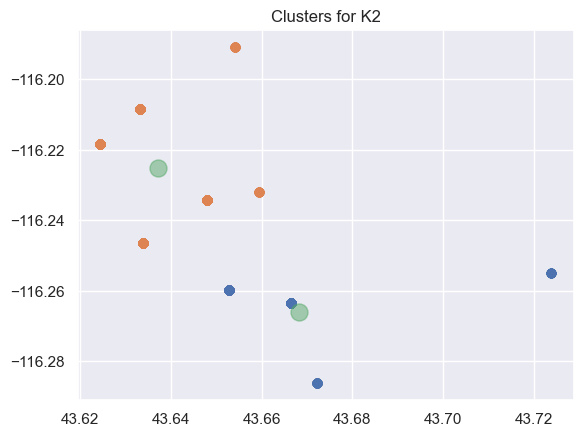

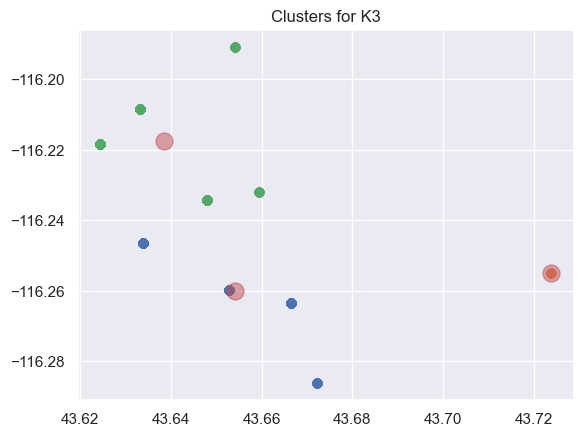

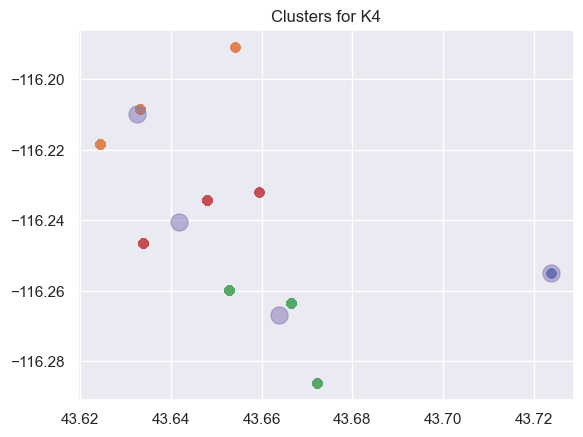

In [284]:
for i in range(len(k2_cluster)):
    x = []
    y = []
    for j in range(len(k2_cluster[i])):
        x.append(k2_cluster[i][j][0])
        y.append(k2_cluster[i][j][1])
    plt.scatter(x, y, alpha=0.5)
x = []
y = []
for i in range(len(store_locations_k2)):
    x.append(store_locations_k2[i][0])
    y.append(store_locations_k2[i][1])
plt.title("Clusters for K2")
plt.scatter(x, y, alpha=0.5,s=150)
plt.show()

for i in range(len(k3_cluster)):
    x = []
    y = []
    for j in range(len(k3_cluster[i])):
        x.append(k3_cluster[i][j][0])
        y.append(k3_cluster[i][j][1])
    plt.scatter(x, y, alpha=0.5)
x = []
y = []
for i in range(len(store_locations_k3)):
    x.append(store_locations_k3[i][0])
    y.append(store_locations_k3[i][1])
plt.title("Clusters for K3")
plt.scatter(x, y, alpha=0.5,s=150)
plt.show()

for i in range(len(k4_cluster)):
    x = []
    y = []
    for j in range(len(k4_cluster[i])):
        x.append(k4_cluster[i][j][0])
        y.append(k4_cluster[i][j][1])
    plt.scatter(x, y, alpha=0.5)
x = []
y = []
for i in range(len(store_locations_k4)):
    x.append(store_locations_k4[i][0])
    y.append(store_locations_k4[i][1])
plt.title("Clusters for K4")
plt.scatter(x, y, alpha=0.5,s=150)
plt.show()

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.